In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer 
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [3]:
# напишем общую функцию для распаковки данных

def open_data(data):
  display(data.head(5))
  print('-----------------')
  print('Общая информация')
  data.info()
  print('-----------------')
  print('Описание данных')
  display(data.describe())
  print('-----------------')
  print('Количество пропусков')
  print(data.isna().sum().sort_values(ascending=False))
  print('-----------------')
  print('Размер выборки')
  print(data.shape)

## Подготовка данных

### Выгрузка данных

In [4]:
#выгрузим данные

train_data = pd.read_csv('/content/drive/My Drive/Collab file/gold_recovery_train_new.csv')
test_data = pd.read_csv('/content/drive/My Drive/Collab file/gold_recovery_test_new.csv')
full_data = pd.read_csv('/content/drive/My Drive/Collab file/gold_recovery_full_new.csv')

In [5]:
open_data(train_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

-----------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                    

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

-----------------
Количество пропусков
secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64
-----------------
Размер выборки
(14149, 87)


In [6]:
open_data(test_data)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

-----------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 n

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

-----------------
Количество пропусков
rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatb

In [7]:
open_data(full_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

-----------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                    

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

-----------------
Количество пропусков
secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64
-----------------
Размер выборки
(19439, 87)


Комментарий:
- В обучающей выборке на 34 признака больше, чем в тестовой.
- Присутствует достаточное количество пропусков во всех таблицах, необходимо будет их изучить.
- Тип данных в столбце date нужно привести к datetime.

### Рассчет эффективности обогощения

На этапе подготовки данных необходимо провести проверку правильности рассчета эффективности обогощения. Для этого нам поможет формула:

**recovery = ((C * (F - T)) / (F * (C - T))) * 100%**

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

**Признаки для проверки формулы это:**

С - rougher.output.concentrate_au

F - rougher.input.feed_au

T - rougher.output.tail_au

Результат формулы - rougher.output.recovery

In [8]:
#рассчет проводим на обучающей выборке, подготовим переменные

C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [9]:
#проверим, есть ли пропуски в столбце rougher.output.recovery

train_data['rougher.output.recovery'].isna().sum()

0

In [10]:
recovery = ((C * (F - T)) / (F * (C - T))) * 100
print(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


In [11]:
#рассчитаем показатель MAE

print('MAE:', mean_absolute_error(train_data['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


**Краткий вывод**
<br>Отклонение достаточно маленькое, поэтому мы можем считать, что эффективность обогощения была посчитана верно.

### Анализ недоступных признаков

In [12]:
#посмотрим какие признаки не попали в тестовый набор

for column in train_data.columns:
    if column not in test_data.columns:
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

**Краткий вывод**

Не попали следующие признаки:
- признаки финальной характеристики: концентрация продуктов
- признаки первичной очистки: концентрация продуктов и "хвосты"
- признаки флотации: расчетные характеристики, концентрация продуктов, эффективность обогощения и "хвосты"
- признаки вторичной очистки: "хвосты"

Все эти признаки не попали в тестовую выборку, так как эти показатели невозможно рассчитать до начала обработки.

### Предобработка данных

В данном пункте нам необходимо привести в порядок обучающую и тестовую выборки, чтобы в дальнейшем мы могли правильно обучить модели. Также нам нужно добавить целевые признаки - rougher.output.recovery и final.output.recovery.

In [13]:
#удалим из обучающей выборки те колонки, которых нет в тестовой

for column in train_data.columns:
    if column not in test_data.columns:
        train_data = train_data.drop(column, 1)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

In [15]:
#теперь добавим целевые признаки в обучающий и тестовый датасеты

target_colls = full_data[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()

In [16]:
train_data = train_data.join(target_colls.set_index('date'), on='date')

In [17]:
test_data = test_data.join(target_colls.set_index('date'), on='date')

In [18]:
#заполним пропуски, так как значения, которые находятся рядом, имеют примерно одинаковые показатели, 
#то воспользуемся методом ffill

train_data = train_data.ffill(axis=0)
test_data = test_data.ffill(axis=0)
full_data = full_data.ffill(axis=0)

In [19]:
# приведем тип столбца date к datetime

test_data['date'] = pd.to_datetime(test_data['date'], format = '%Y-%m-%d %H:%M:%S')
train_data['date'] = pd.to_datetime(train_data['date'], format = '%Y-%m-%d %H:%M:%S')
full_data['date'] = pd.to_datetime(full_data['date'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14149 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               14149 non-null  float64       
 2   primary_cleaner.input.depressant            14149 non-null  float64       
 3   primary_cleaner.input.feed_size             14149 non-null  float64       
 4   primary_cleaner.input.xanthate              14149 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64       
 9   primar

In [22]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

### Вывод по разделу

- Данные выгружены и проанализированы
- Пропуски заполнены методом ffill
- Столбец date приведен к соответствующему типу данных.
- Проверена точность расчета эффективности обогощения - с данными все в порядке.
- В обучающую выборку были добавлены целевые признаки и были удалены колонки, которых нет в тестовой выборке
- В тестовую выборку были добавлены целевые признаки
- Данные готовы для дальнейшей работы

## Анализ данных

### Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

In [23]:
mean_au_rougher = full_data['rougher.input.feed_au'].mean() #исходное сырье
mean_au_float = full_data['rougher.output.concentrate_au'].mean() #флотация
mean_au_1_clean = full_data['primary_cleaner.output.concentrate_au'].mean() #первичная очистка
mean_au_final = full_data['final.output.concentrate_au'].mean() #финал


print('Средняя концентрация золота в исходном сырье: {:.2f}'.format(mean_au_rougher))
print('Средняя концентрация золота после флотации: {:.2f}'.format(mean_au_float))
print('Средняя концентрация золота после первичной очистки: {:.2f}'.format(mean_au_1_clean))
print('Средняя концентрация золота после вторичной очистки: {:.2f}'.format(mean_au_final))

Средняя концентрация золота в исходном сырье: 8.27
Средняя концентрация золота после флотации: 19.77
Средняя концентрация золота после первичной очистки: 32.12
Средняя концентрация золота после вторичной очистки: 44.08


Text(0.5, 0, 'Концентрация')

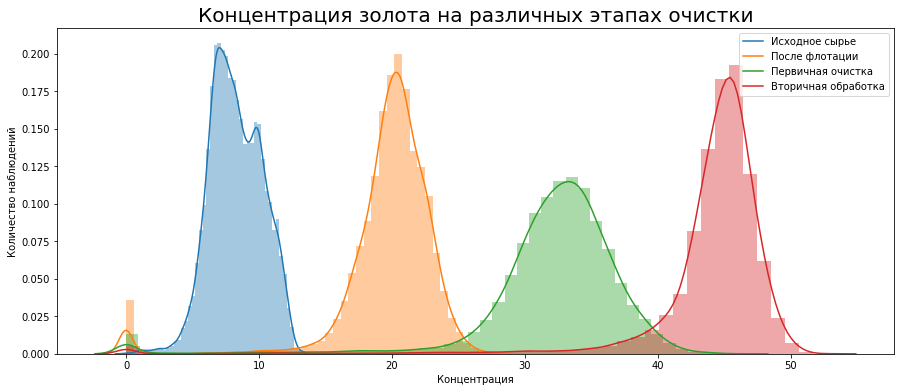

In [24]:
plt.figure(figsize=(15, 6))

sns.distplot(full_data['rougher.input.feed_au'], kde_kws= {"label": "Исходное сырье"})
sns.distplot(full_data['rougher.output.concentrate_au'], kde_kws= {"label": "После флотации"})
sns.distplot(full_data['primary_cleaner.output.concentrate_au'], kde_kws= {"label": "Первичная очистка"})
sns.distplot(full_data['final.output.concentrate_au'], kde_kws= {"label": "Вторичная обработка"})

plt.title(label='Концентрация золота на различных этапах очистки', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>С каждым этапом обработки концентрация золота увеличивается. Особенно заметен переход от исходного сырья к флотации - показатель сильно вырос.



#### Серебро

In [25]:
mean_ag_rougher = full_data['rougher.input.feed_ag'].mean() #исходное сырье
mean_ag_float = full_data['rougher.output.concentrate_ag'].mean() #флотация
mean_ag_1_clean = full_data['primary_cleaner.output.concentrate_ag'].mean() #первичная очистка
mean_ag_final = full_data['final.output.concentrate_ag'].mean() #финал


print('Средняя концентрация серебра в исходном сырье: {:.2f}'.format(mean_ag_rougher))
print('Средняя концентрация серебра после флотации: {:.2f}'.format(mean_ag_float))
print('Средняя концентрация серебра после первичной очистки: {:.2f}'.format(mean_ag_1_clean))
print('Средняя концентрация серебра после вторичной очистки: {:.2f}'.format(mean_ag_final))

Средняя концентрация серебра в исходном сырье: 8.79
Средняя концентрация серебра после флотации: 11.99
Средняя концентрация серебра после первичной очистки: 8.44
Средняя концентрация серебра после вторичной очистки: 5.17


Text(0.5, 0, 'Концентрация')

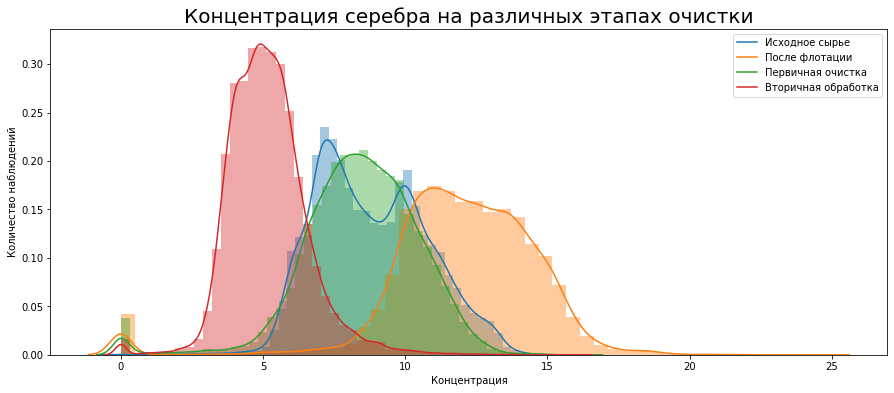

In [26]:
plt.figure(figsize=(15, 6))

sns.distplot(full_data['rougher.input.feed_ag'], kde_kws= {"label": "Исходное сырье"})
sns.distplot(full_data['rougher.output.concentrate_ag'], kde_kws= {"label": "После флотации"})
sns.distplot(full_data['primary_cleaner.output.concentrate_ag'], kde_kws= {"label": "Первичная очистка"})
sns.distplot(full_data['final.output.concentrate_ag'], kde_kws= {"label": "Вторичная обработка"})

plt.title(label='Концентрация серебра на различных этапах очистки', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>Результаты с серебром сильно отличаются от результатов по золоту. Интересно, что наибольшая концентрация достигается на этапе флотации, а после она снова падает, и становится даже меньше, чем в исходном сырье.

#### Свинец

In [27]:
mean_pb_rougher = full_data['rougher.input.feed_pb'].mean() #исходное сырье
mean_pb_float = full_data['rougher.output.concentrate_pb'].mean() #флотация
mean_pb_1_clean = full_data['primary_cleaner.output.concentrate_pb'].mean() #первичная очистка
mean_pb_final = full_data['final.output.concentrate_pb'].mean() #финал


print('Средняя концентрация свинца в исходном сырье: {:.2f}'.format(mean_pb_rougher))
print('Средняя концентрация свинца после флотации: {:.2f}'.format(mean_pb_float))
print('Средняя концентрация свинца после первичной очистки: {:.2f}'.format(mean_pb_1_clean))
print('Средняя концентрация свинца после вторичной очистки: {:.2f}'.format(mean_pb_final))

Средняя концентрация свинца в исходном сырье: 3.59
Средняя концентрация свинца после флотации: 7.61
Средняя концентрация свинца после первичной очистки: 9.81
Средняя концентрация свинца после вторичной очистки: 9.98


Text(0.5, 0, 'Концентрация')

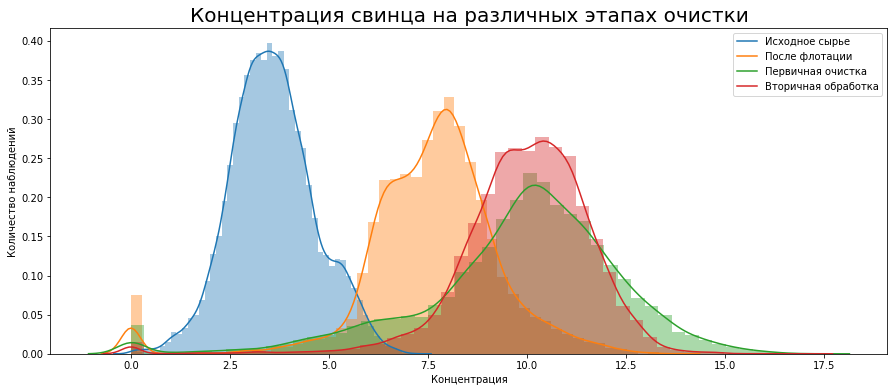

In [28]:
plt.figure(figsize=(15, 6))

sns.distplot(full_data['rougher.input.feed_pb'], kde_kws= {"label": "Исходное сырье"})
sns.distplot(full_data['rougher.output.concentrate_pb'], kde_kws= {"label": "После флотации"})
sns.distplot(full_data['primary_cleaner.output.concentrate_pb'], kde_kws= {"label": "Первичная очистка"})
sns.distplot(full_data['final.output.concentrate_pb'], kde_kws= {"label": "Вторичная обработка"})

plt.title(label='Концентрация свинца на различных этапах очистки', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>Концентрация свинца от этапа к этапу растет, однако несильно. На этапах очистки показатели практически равны.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

In [29]:
#сравним распределения на этапе флотации - rougher.input.feed_size

train_data['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [30]:
test_data['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Text(0.5, 0, 'Размер гранул')

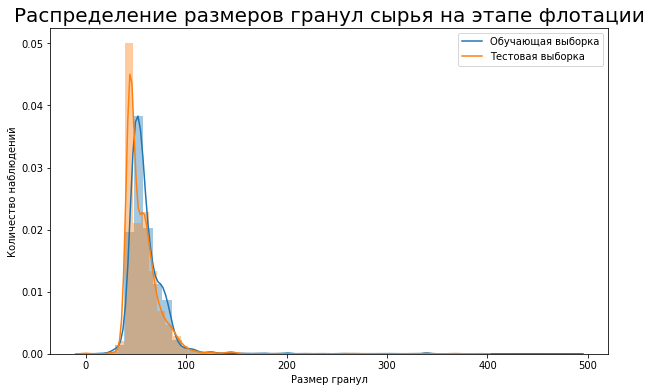

In [31]:
plt.figure(figsize=(10, 6))

sns.distplot(train_data['rougher.input.feed_size'], kde_kws= {"label": "Обучающая выборка"})
sns.distplot(test_data['rougher.input.feed_size'], kde_kws= {"label": "Тестовая выборка"})

plt.title(label='Распределение размеров гранул сырья на этапе флотации', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Размер гранул')

**Краткий вывод** 
<br>На двух выборках распределение примерно одинаковое, средние значения несильно отличаются друг от друга.

In [32]:
#сравним распределения на этапе первой очистки - primary_cleaner.input.feed_size

train_data['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [33]:
test_data['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

Text(0.5, 0, 'Размер гранул')

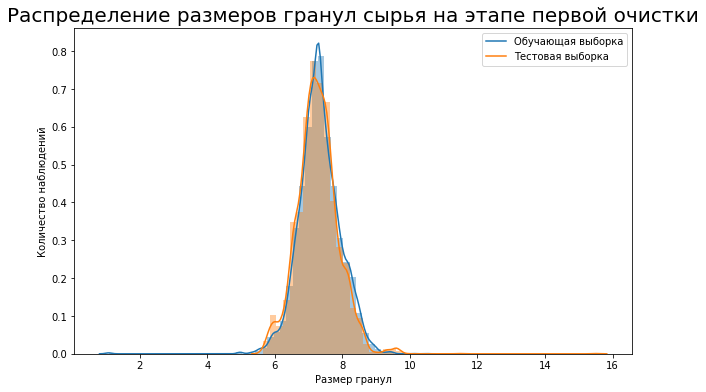

In [34]:
plt.figure(figsize=(10, 6))

sns.distplot(train_data['primary_cleaner.input.feed_size'], kde_kws= {"label": "Обучающая выборка"})
sns.distplot(test_data['primary_cleaner.input.feed_size'], kde_kws= {"label": "Тестовая выборка"})

plt.title(label='Распределение размеров гранул сырья на этапе первой очистки', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Размер гранул')

**Краткий вывод** 
<br>Размеры гранул сырья сильно уменьшились по сравнению с этапом флотации. Распределение практически одинаковое на обеих выборках.

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

#### Исходное сырье

In [35]:
sum_concentrate = full_data['rougher.input.feed_ag'] + full_data['rougher.input.feed_au'] + full_data['rougher.input.feed_pb'] 

In [36]:
sum_concentrate.describe()

count    19439.000000
mean        20.646120
std          4.480027
min          0.030000
25%         17.252879
50%         20.141216
75%         23.797381
max         33.498784
dtype: float64

Text(0.5, 0, 'Концентрация')

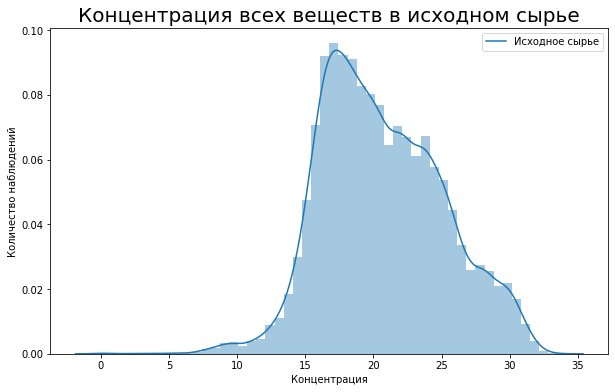

In [37]:
plt.figure(figsize=(10, 6))

sns.distplot(sum_concentrate, kde_kws= {"label": "Исходное сырье"})

plt.title(label='Концентрация всех веществ в исходном сырье', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>Распределение похоже на нормальное, среднее значение - 20. Доля веществ в исходном сырье не такая уж и большая. То есть большая часть приходится на отходы.

#### После флотации

In [38]:
sum_concentrate_f = full_data['rougher.output.concentrate_au'] + full_data['rougher.output.concentrate_ag'] + full_data['rougher.output.concentrate_pb']

In [39]:
sum_concentrate_f.describe()

count    19439.000000
mean        39.373032
std          6.863389
min          0.000000
25%         38.394639
50%         40.312648
75%         42.365102
max         55.568687
dtype: float64

Text(0.5, 0, 'Концентрация')

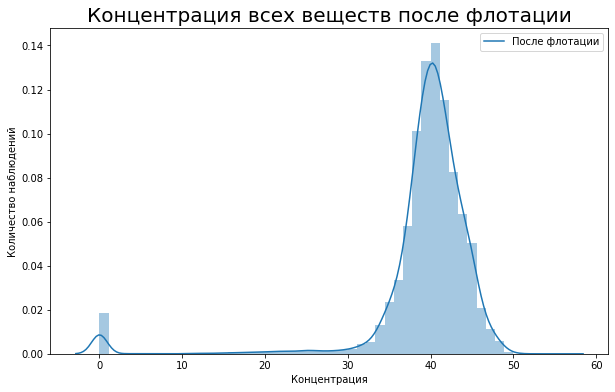

In [40]:
plt.figure(figsize=(10, 6))

sns.distplot(sum_concentrate_f, kde_kws= {"label": "После флотации"})

plt.title(label='Концентрация всех веществ после флотации', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>После данного этапа концентрация увеличилась. Наблюдаются выбросы в районе нулевых значений.

#### Финальный этап

In [41]:
sum_concentrate_end = full_data['final.output.concentrate_au'] + full_data['final.output.concentrate_ag'] + full_data['final.output.concentrate_pb']

In [42]:
sum_concentrate_end.describe()

count    19439.000000
mean        59.223721
std          6.095138
min          0.000000
25%         59.298323
50%         60.306921
75%         61.096667
max         64.968881
dtype: float64

Text(0.5, 0, 'Концентрация')

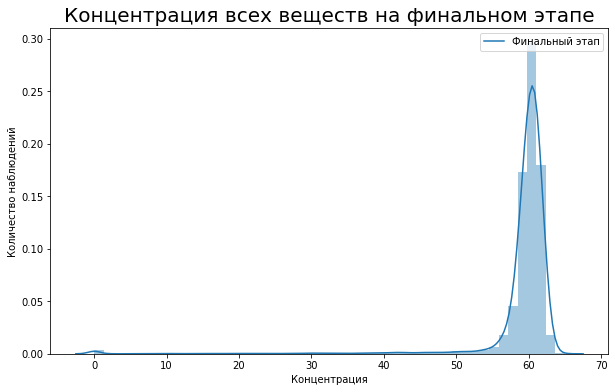

In [43]:
plt.figure(figsize=(10, 6))

sns.distplot(sum_concentrate_end, kde_kws= {"label": "Финальный этап"})

plt.title(label='Концентрация всех веществ на финальном этапе', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')

**Краткий вывод** 
<br>Концентрация всех веществ сильно увеличилась, большинство значений сосредоточено вокруг среднего значения - 59. В финальном продукте концентрация полезных веществ больше, чем остальных.

### Коррекция выборки

Так как в суммарных концентрациях присутствуют нулевые значения, то избавимся от них в обучающей и тестовой выборках.

In [44]:
for df in [train_data, test_data]:
    df.drop(df[((
        df['rougher.input.feed_ag'] == 0) | (df['rougher.input.feed_au'] == 0) |
    (df['rougher.input.feed_pb'] == 0) |  (df['rougher.input.feed_ag'] == 0) | (df['rougher.input.feed_au'] == 0) |  (df['rougher.input.feed_pb'] == 0))].index, inplace=True)

### Вывод по разделу

- Данные по веществам проанализированы
- Концентрация золота и свинца с каждым этапом обработки увеличивается, в то время, как концентрация серебра наоборот снижается
- Размеры гранул сырья с каждым этапом уменьшаются
- Доля веществ в итоговом продукте получается в среднем 59, что больше половины, следовательно полезные вещества в конечном продукте преобладают

## Модель

### sMAPE

In [45]:
#напишем функцию для вычисления этой метрики

def smape(target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

In [46]:
#а также функцию для вычисления итогового sMAPE

def final_smape(rougher, final):
    return 0.25 * rougher + 0.75 * final

### Подготовка данных

In [47]:
#обучающая выборка

features_train = train_data.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_train_final = train_data['final.output.recovery']
target_train_rougher = train_data['rougher.output.recovery']

In [48]:
print(features_train.shape)
print(target_train_final.shape)
print(target_train_rougher.shape)

(14149, 52)
(14149,)
(14149,)


In [49]:
#масштабируем признаки

scaler = StandardScaler()
scaler.fit(features_train) 
features_train_s = scaler.transform(features_train)

In [50]:
#тестовая выборка

features_test = test_data.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test_final = test_data['final.output.recovery']
target_test_rougher = test_data['rougher.output.recovery']

In [51]:
print(features_test.shape)
print(target_test_final.shape)
print(target_test_rougher.shape)

(5290, 52)
(5290,)
(5290,)


In [52]:
#масштабируем признаки

scaler.fit(features_test) 
features_test_s = scaler.transform(features_test)

### Проверка моделей кросс-валидацией

Оценим следующие модели:

- LinearRegression
- LGBMRegressor
- RandomForestRegressor

По итогам оценки качества выберем наилучшую модель и посчитаем целевую метрику. Для большинства моделей заранее подберем гипперпараметры с помощью GridSearch, чтобы оценка была точнее.

In [53]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [54]:
%%time

# проверим модель линейной регрессии для чернового концентрата

model_lin_1 = LinearRegression()
scores_lin_1 = cross_val_score(model_lin_1, features_train, target_train_rougher, cv=5, scoring=my_scorer)
final_score_lin_1 = abs(scores_lin_1.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_lin_1))

Средняя оценка качества модели: 12.80
CPU times: user 184 ms, sys: 74.6 ms, total: 258 ms
Wall time: 149 ms


In [55]:
%%time

# проверим модель линейной регрессии для финального концентрата

model_lin_2 = LinearRegression()
scores_lin_2 = cross_val_score(model_lin_2, features_train, target_train_final, cv=5, scoring=my_scorer)
final_score_lin_2 = abs(scores_lin_2.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_lin_2))

Средняя оценка качества модели: 12.25
CPU times: user 167 ms, sys: 91.7 ms, total: 259 ms
Wall time: 138 ms


In [56]:
%%time

# проверим модель LGBMRegressor для чернового концентрата

model_lgbm_1 = LGBMRegressor(random_state=45, learning_rate=0.1, max_depth=2, n_estimators=50)
scores_lgbm_1 = cross_val_score(model_lgbm_1, features_train, target_train_rougher, cv=5, scoring=my_scorer)
final_score_lgbm_1 = abs(scores_lgbm_1.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_lgbm_1))

Средняя оценка качества модели: 10.78
CPU times: user 1.31 s, sys: 66.8 ms, total: 1.37 s
Wall time: 751 ms


In [57]:
%%time

# проверим модель LGBMRegressor для финального концентрата

model_lgbm_2 = LGBMRegressor(random_state=45, learning_rate=0.1, max_depth=2, n_estimators=50)
scores_lgbm_2 = cross_val_score(model_lgbm_2, features_train, target_train_final, cv=5, scoring=my_scorer)
final_score_lgbm_2 = abs(scores_lgbm_2.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_lgbm_2))

Средняя оценка качества модели: 10.04
CPU times: user 1.28 s, sys: 8.02 ms, total: 1.29 s
Wall time: 694 ms


In [58]:
%%time

# проверим модель случайного леса для чернового концентрата

model_forest_1 = RandomForestRegressor(random_state=45, n_estimators=100, max_depth=5)
scores_forest_1 = cross_val_score(model_forest_1, features_train, target_train_rougher, cv=5, scoring=my_scorer)
final_score_forest_1 = abs(scores_forest_1.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_forest_1))

Средняя оценка качества модели: 10.96
CPU times: user 1min 29s, sys: 87.2 ms, total: 1min 29s
Wall time: 1min 31s


In [59]:
%%time

# проверим модель случайного леса для финального концентрата

model_forest_2 = RandomForestRegressor(random_state=45, n_estimators=100, max_depth=5)
scores_forest_2 = cross_val_score(model_forest_2, features_train, target_train_final, cv=5, scoring=my_scorer)
final_score_forest_2 = abs(scores_forest_2.mean())
print('Средняя оценка качества модели: {:.2f}'.format(final_score_forest_2))

Средняя оценка качества модели: 10.29
CPU times: user 1min 27s, sys: 78.6 ms, total: 1min 27s
Wall time: 1min 28s


**Краткий вывод** 
- Наилучшие показатели для данных по черновому концентрату показала модель LGBMRegressor с результатом: 10.78
- Наилучшие показатели для данных по финальному концентрату показала модель LGBMRegressor с результатом: 10.04

Модель случайного леса тоже дала хорошие результаты, очень близкие к LGBM.


### Модель для эффективности обогащения чернового концентрата 

In [60]:
%%time 

# обучение

model_lgbm_1 = LGBMRegressor(random_state=45, learning_rate=0.1, max_depth=2, n_estimators=50)
model_lgbm_1.fit(features_train, target_train_rougher)
predicted_valid_lgbm_1 = model_lgbm_1.predict(features_test)

CPU times: user 289 ms, sys: 4.01 ms, total: 293 ms
Wall time: 155 ms


In [61]:
%%time 

# посчитаем метрики 

mse_lgbm_1 = mean_squared_error(target_test_rougher, predicted_valid_lgbm_1)
print('MSE = {:.2f}'.format(mse_lgbm_1))
print('RMSE = {:.2f}'.format(mse_lgbm_1 ** 0.5))
print('R2 = {:.2f}'.format(r2_score(target_test_rougher, predicted_valid_lgbm_1)))
print('MAE = {:.2f}'.format(mean_absolute_error(target_test_rougher, predicted_valid_lgbm_1)))
print('sMAPE = {:.2f}'.format(smape(target_test_rougher, predicted_valid_lgbm_1)))

MSE = 158.67
RMSE = 12.60
R2 = 0.07
MAE = 5.79
sMAPE = 8.88
CPU times: user 6.18 ms, sys: 0 ns, total: 6.18 ms
Wall time: 6.6 ms


### Модель для эффективности обогащения финального концентрата

In [62]:
%%time 

# обучение

model_lgbm_2 = LGBMRegressor(random_state=45, learning_rate=0.1, max_depth=2, n_estimators=50)
model_lgbm_2.fit(features_train, target_train_final)
predicted_valid_lgbm_2 = model_lgbm_2.predict(features_test)

CPU times: user 289 ms, sys: 1.02 ms, total: 290 ms
Wall time: 155 ms


In [63]:
%%time

# посчитаем метрики 

mse_lgbm_2 = mean_squared_error(target_test_final, predicted_valid_lgbm_2)
print('MSE = {:.2f}'.format(mse_lgbm_2))
print('RMSE = {:.2f}'.format(mse_lgbm_2 ** 0.5))
print('R2 = {:.2f}'.format(r2_score(target_test_final, predicted_valid_lgbm_2)))
print('MAE = {:.2f}'.format(mean_absolute_error(target_test_final, predicted_valid_lgbm_2)))
print('sMAPE = {:.2f}'.format(smape(target_test_final, predicted_valid_lgbm_2)))

MSE = 78.48
RMSE = 8.86
R2 = 0.13
MAE = 5.42
sMAPE = 8.96
CPU times: user 8.08 ms, sys: 2 ms, total: 10.1 ms
Wall time: 7.24 ms


**Комментарий:**
<br> Дополнительно был произведен рассчет других метрик для моделей, так как интересно было посмотреть на результаты в целом. Можно сказать, что несмотря на то, что целевые метрики у моделей получились практически равными, RMSE и R2 довольно сильно отличаются. У модели 1 (черновой концентрат) метрика RMSE получилась гораздо выше, чем у модели 2 (финальный концентрат), но при этом показатель R2 у модели 1 гораздо лучше - он намного ближе к нулю, что говорит нам о более высокой точности предсказаний.

### Метрики sMAPE и итоговый sMAPE

In [64]:
smape_rougher = smape(target_test_rougher, predicted_valid_lgbm_1)
smape_final = smape(target_test_final, predicted_valid_lgbm_2)
total_smape = final_smape(smape_rougher, smape_final)
print('Итоговый sMAPE = {:.2f}'.format(total_smape))

Итоговый sMAPE = 8.94


### Тестирование модели - сравнение с константной моделью

In [65]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_train_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_train_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [66]:
smape_rougher_dummy = smape(target_test_rougher, dummy_predictions_rougher)
smape_final_dummy = smape(target_test_final, dummy_predictions_final)

In [67]:
final_smape(smape_rougher_dummy, smape_final_dummy)

10.289630376021035

Наш результат получился лучше, чем у константной модели. Это говорит о том, что наши модели прошли проверку.

### Вывод по разделу

- Были подобраны наиболее подходящие модели с помощью кросс-валидации - LGBMRegressor.
- Итоговые метрики для предсказания эффективности обогощения чернового концентрата получились следующие:
  - MSE = 78.48
  - RMSE = 8.86
  - R2 = 0.13
  - MAE = 5.42
  - sMAPE = 8.96
- Итоговые метрики для предсказания эффективности обогощения финального концентрата получились следующие:
  - MSE = 158.67
  - RMSE = 12.60
  - R2 = 0.07
  - MAE = 5.79
  - sMAPE = 8.88

***- Итоговый sMAPE = 8.94***

## Итоговый вывод

- В ходе исследования была выбрана модель LGBMRegressor (параметры для нее подбирались отдельно с помощью GridSearch) для предсказания целевых признаков для чернового и для финального концентратов.
- Обе модели прошли проверку сравнением с константной моделью.
- На этапе анализа данных было выявлено:
    - Концентрация золота и свинца с каждым этапом обработки увеличивается, в то время, как концентрация серебра наоборот снижается
    - Размеры гранул сырья с каждым этапом уменьшаются
    - Доля веществ в итоговом продукте получается в среднем 59, что больше половины, следовательно полезные вещества в конечном продукте преобладают
- ***Финальная метрика sMAPE: 8.94*** - что кажется, вполне допустимым результатом.
- Результат в дальнейшем можно улучшить, если бы была возможность с точки зрения физики и технологического процесса проверить достоверность данных, но без глубинного знания самих этапов, это невозможно.